# Data Science - Module 2 - Final Project Submission

* Student Name: **James Toop**
* Student Pace: **Self Paced**
* Scheduled project review date/time: **Wednesday, 23rd December 2020 - 9.30pm GMT**
* Instructor name: **Jeff Herman**
* Blog post URL: **TBC**

## Table of Contents
1. [Business Case](#business-case)
2. [Exploratory Data Analysis](#eda)
    1. [Discovery](#data-discovery)
    2. [Preprocessing](#data-preprocessing)
    
3. [Linear Regression](#linear-regression)

---
<a name="business-case"></a>
## 1. Business Case

A property development company wants to better understand the different factors that influence the sale price of a property to better inform the planning, design and marketing of new build or renovated properties within the King County area of Washington State.  

To this end they are keen to use multivariate linear regression analysis to assist in their decision making processes, in particular the company are interested in understanding the effect that variables that they can control have on the property price including following:

* What size of property to build? (including overall living space and number of bedrooms)
* What locations within the King County area offer the best return on investment?
* What should the final price of the property be?
* What effect does the age of a property have on price? (to show that newer houses sell for more than older houses that haven't been renovated).
* Is there an ideal living space to plot area ratio?

---
<a name="eda"></a>
## 2. Exploratory Data Analysis (EDA)

<a name="data-discovery"></a>
### A. Data Discovery

This section presents an initial step to investigate, understand and document the available data fields and relationships, highlighting any potential issues / shortcomings within the datasets supplied.

In [44]:
# Import the relevant libraries for data discovery and regression analysis
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
# pd.set_option("max_rows", None)

In [4]:
# Import the relevant data file from the repository then inspect the data
house_sales = pd.read_csv('kc_house_data.csv')
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
# View unique values for specific category fields
view_values = np.sort(house_sales['view'].unique())
condition_values = np.sort(house_sales['condition'].unique())
grade_values = np.sort(house_sales['grade'].unique())
floor_values = np.sort(house_sales['floors'].unique())
zipcode_values = np.sort(house_sales['zipcode'].unique())
renovated_values = np.sort(house_sales['yr_renovated'].unique())

print(len(view_values),"view rating options:\n", view_values)
print(len(condition_values),"condition rating options:\n", condition_values)
print(len(grade_values),"grade rating options:\n", grade_values)
print(len(floor_values), "floor options:\n", floor_values)
print(len(zipcode_values),"zipcodes:\n", zipcode_values)
print(len(renovated_values),"year renovated options:\n", renovated_values)

6 view rating options:
 [ 0.  1.  2.  3.  4. nan]
5 condition rating options:
 [1 2 3 4 5]
11 grade rating options:
 [ 3  4  5  6  7  8  9 10 11 12 13]
6 floor options:
 [1.  1.5 2.  2.5 3.  3.5]
70 zipcodes:
 [98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]
71 year renovated options:
 [   0. 1934. 1940. 1944. 1945. 1946. 1948. 1950. 1951. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1962. 1963. 1964. 1965. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 

In [8]:
# View value counts for specific category fields
print(house_sales['view'].value_counts(sort=False),"\n")
print(house_sales['waterfront'].value_counts(sort=False),"\n")
print(house_sales['grade'].value_counts(sort=False),"\n")
print(house_sales['condition'].value_counts(sort=False),"\n")

0.0    19422
3.0      508
4.0      317
2.0      957
1.0      330
Name: view, dtype: int64 

0.0    19075
1.0      146
Name: waterfront, dtype: int64 

3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64 

1       29
2      170
3    14020
4     5677
5     1701
Name: condition, dtype: int64 



In [9]:
# Review year renovated data as there are only 17755 records compared to the 21597 for other fields
house_sales['yr_renovated'].value_counts(ascending=False, dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

<a name="section1.1.1"></a>
### Updated Field Descriptions

Having reviewed and researched the column headings provided in the repository, here is some more detail as to the descriptions of the data fields including some clarification on certain values within the fields.

**id**
: a unique identifier for a property

**date**
: date property was sold (note: uses US date formatting)

**price**
: sale price (target variable)

**bedrooms**
: number of bedrooms

**bathrooms**
: number of bathrooms (note: includes half and quarter bathrooms, e.g. a "half bathroom" would be a toilet & sink)
[view more detail](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/24804)

**sqft_living**
: square footage of the living space

**sqft_lot**
: square footage of the plot of the property

**floors**
: number of floors (levels) in the property (note that there are half floors)

**waterfront**
: dummy variable indicating that property has a view to a waterfront (boolean)

**view**
: a rating, between 0 and 4, describing the view of the property

**condition**
: a rating, between 1 and 5, describing the overall condition of the property, [view full detail](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#building%20condition)
 
* **1** - Poor
* **2** - Fair
* **3** - Average
* **4** - Good
* **5** - Very Good

**grade**
: overall grade given to the property unit representing the construction quality of improvements, [view full detail](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#building%20grade)

* **1-3** - Falls short of minimum building standards
* **4** - Generally older, low quality construction, does not meet code
* **5** - Low construction costs and workmanship, small, simple design.
* **6** - Lowest grade currently meeting building code, low quality materials and simple designs.
* **7** - Average grade of construction and design.
* **8** - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* **9** - Better architectural design with extra interior and exterior design and quality.
* **10** - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen.
* **11** - Custom design and higher quality finish work.
* **12** - Custom design and excellent builders, all materials are of the highest quality.
* **13** - Generally custom designed and built, large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

**sqft_above**
: square footage of property above and including ground floor

**sqft_basement**
: square footage of the property below ground floor (i.e. the basement)

**yr_built**
: year the property was built

**yr_renovated**
: year the house was renovated

**zipcode**
: zip code of the property

**lat**
: latitude coordinate of the property

**long**
: longitude coordinate of the property

**sqft_living15**
: the average square footage of interior housing living space for the nearest 15 neighbours

**sqft_lot15**
: the average square footage of the land plots of the nearest 15 neighbours



<a name="data-preprocessing-p1"></a>
## B. Data Preprocessing

In [10]:
# Check for duplicate records
len(house_sales[house_sales.duplicated()])

0

In [11]:
# Data preprocessing, converting data types and handling missing data
house_sales['date'] = pd.to_datetime(house_sales['date']) 
house_sales['waterfront'] = house_sales['waterfront'].fillna(0).astype(int)
house_sales['view'] = house_sales['view'].fillna(0).astype(int)
house_sales['yr_renovated'] = house_sales['yr_renovated'].fillna(0).astype(int)

# Create additional field deriving the age of the property from the maximum sale data within the dataset
house_sales['age'] = (house_sales['date'].max().year - house_sales['yr_built']) 

# Derive missing values in sqft_basement field with calculated values from sqft_living and sqft_above
for i in list(house_sales.loc[house_sales['sqft_basement'] == '?'].index.values):
    house_sales.loc[i,'sqft_basement'] = house_sales.loc[i,'sqft_living'] - house_sales.loc[i,'sqft_above']


house_sales['sqft_basement'] = house_sales['sqft_basement'].astype(float).astype(int)

# Remove outliers based on number of bedrooms, with one record having 33 bedrooms 
house_sales = house_sales[(house_sales['bedrooms'] <= 15)]

# Remove outliers based on zero bathrooms as dubious as to whether you could define this as a house
house_sales = house_sales[(house_sales['bathrooms'] != 0)]

# Remove outliers based on price of house being zero and less than $2M
house_sales = house_sales[(house_sales['price'] > 0) & (house_sales['price'] <= 2000000)]

In [12]:
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [13]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.139800e+04,2.139800e+04,21398.000000,21398.000000,21398.000000,2.139800e+04,21398.000000,21398.000000,21398.000000,21398.000000,...,21398.000000,21398.000000,21398.000000,21398.000000,21398.000000,21398.000000,21398.000000,21398.000000,21398.000000,21398.000000
mean,4.585186e+09,5.196011e+05,3.362697,2.099682,2052.824189,1.502894e+04,1.490630,0.004814,0.216936,3.408636,...,1767.915833,284.908356,1970.996074,66.878073,98078.078512,47.559532,-122.213728,1972.632302,12706.148378,44.003926
std,2.877365e+09,2.880135e+05,0.898299,0.746555,863.493926,4.142050e+04,0.539026,0.069214,0.731232,0.649376,...,792.882936,431.006658,29.313655,359.198102,53.483908,0.138990,0.141118,668.787404,27299.761573,29.313655
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.124069e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.469300,-122.329000,1480.000000,5100.000000,18.000000
50%,3.904985e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.579500e+03,1.500000,0.000000,0.000000,3.000000,...,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570750,-122.230000,1830.000000,7600.000000,40.000000
75%,7.313125e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.055875e+04,2.000000,0.000000,0.000000,4.000000,...,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2340.000000,10026.000000,63.000000
max,9.900000e+09,2.000000e+06,11.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,115.000000


In [14]:
# Create two dataframes to hold property price data for houses built or renovated in the last 15 years

new_house_sales = house_sales[(house_sales['age']<=15)
                             | (house_sales['yr_renovated']>=2000)]

old_house_sales = house_sales[(house_sales['age']>15)
                             & (house_sales['yr_renovated']<2000)]


# Calculate the average sale price for old and new houses

print('Average sale price of',len(new_house_sales),'new houses = $', round(new_house_sales['price'].mean(),0))
print('Average sale price of',len(old_house_sales),'old houses = $', round(old_house_sales['price'].mean(),0))

Average sale price of 5054 new houses = $ 597544.0
Average sale price of 16344 old houses = $ 495499.0


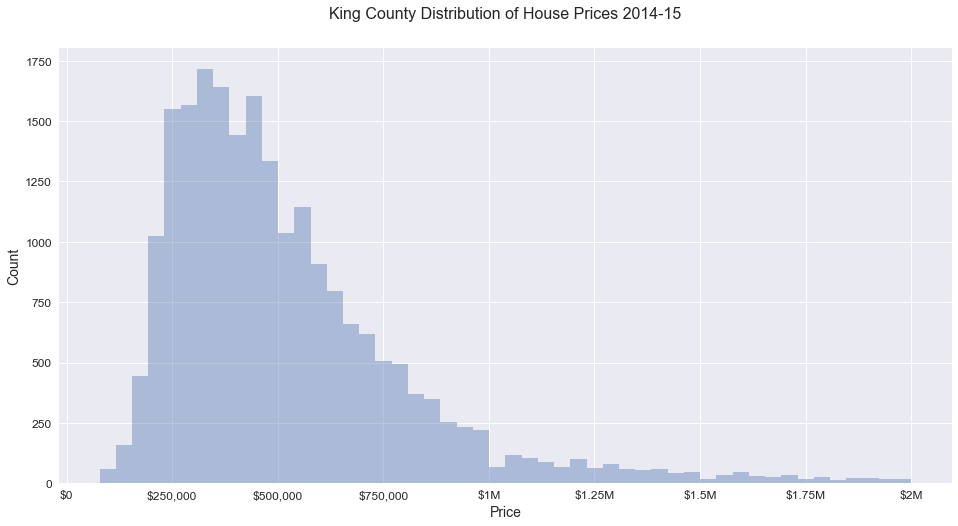

In [16]:
# Create a plot to look at the distribution of house prices across King County
# TO DO: Plot old and new house prices on this bar chart to show the increase in average sale price

existing_xvalues = [0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000]
readable_xvalues = ['$0','$250,000','$500,000','$750,000','$1M','$1.25M','$1.5M','$1.75M','$2M']
plt.figure(figsize=(16,8))
plt.title('King County Distribution of House Prices 2014-15', fontsize=16, pad=30)
price_dist = sns.distplot(house_sales['price'], kde=False)
price_dist.set_xlabel('Price', fontsize=14)
price_dist.set_ylabel('Count', fontsize=14)
plt.xticks(existing_xvalues, readable_xvalues, fontsize=12)
plt.yticks(fontsize=12)
plt.show();

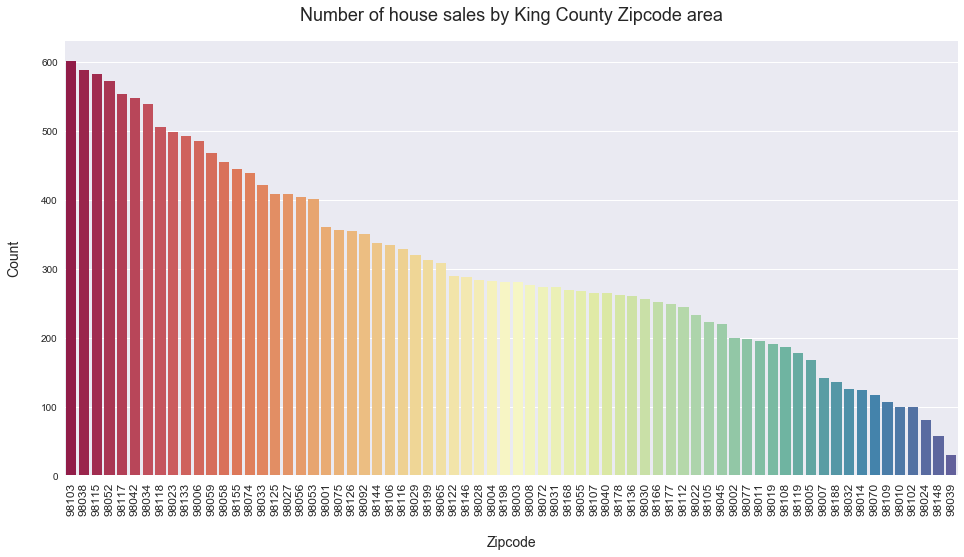

In [17]:
# Create new dataframe grouping the number of houses by zipcode area

zipcode_houses = house_sales.groupby(['zipcode']).size().reset_index(name='count')

# Create a plot to look at the number of houses within each zipcode area

plt.figure(figsize=(16,8))
plt.title('Number of house sales by King County Zipcode area', fontsize=18, pad=20)
zipcode_dist = sns.barplot(
    x=zipcode_houses['zipcode'],
    y=zipcode_houses['count'], 
    data=zipcode_houses,
    order=zipcode_houses.sort_values('count', ascending=False).zipcode,
    palette='Spectral'
)

zipcode_dist.set_xlabel('Zipcode', fontsize=14, labelpad=20)
zipcode_dist.set_ylabel('Count', fontsize=14, labelpad=20)
zipcode_dist.set_xticklabels(zipcode_dist.get_xticklabels(), rotation=90, fontsize=12)
plt.show();

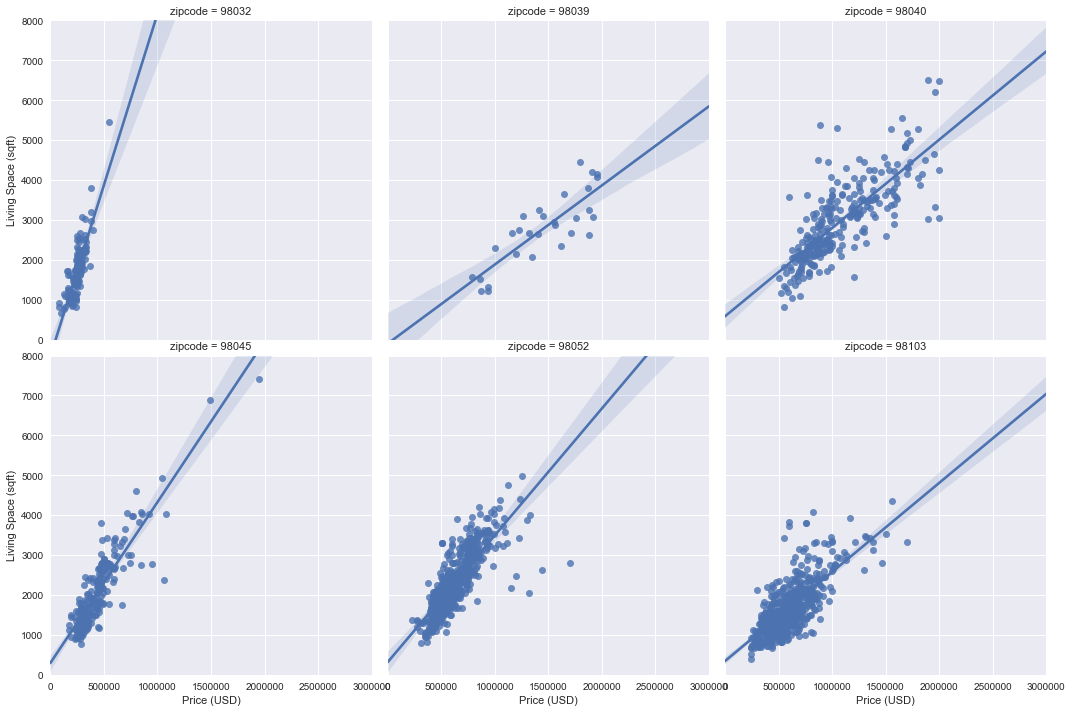

In [18]:
# Create a new dataframe filtering out specific zipcodes
# 98032 = Kent
# 98039 = Medina - least dense with house sales
# 98040 = Mercer Island
# 98045 = North Bend
# 98052 = Redmond
# 98103 = Seattle - most dense with house sales

zipcode_shorter = house_sales[(house_sales['zipcode']==98052)
                             | (house_sales['zipcode']==98032)
                             | (house_sales['zipcode']==98045)
                             | (house_sales['zipcode']==98040)
                             | (house_sales['zipcode']==98103)
                             | (house_sales['zipcode']==98039)]

# Create scatterplots to investigate how price varies with living space and between zipcodes

chart3 = sns.FacetGrid(zipcode_shorter, 
                  col="zipcode", 
                  col_wrap=3, 
                  ylim=(0, 8000), 
                  xlim=(0, 3000000),  
                  height=5)
chart3.map(sns.regplot, "price", "sqft_living", fit_reg=True, x_jitter=.1)
chart3.set_axis_labels('Price (USD)', 'Living Space (sqft)')
chart3.fig.subplots_adjust(wspace=.05, hspace=.05)
plt.show();

---
<a name="linear-regression"></a>
# 3. Linear Regression

### Model 1

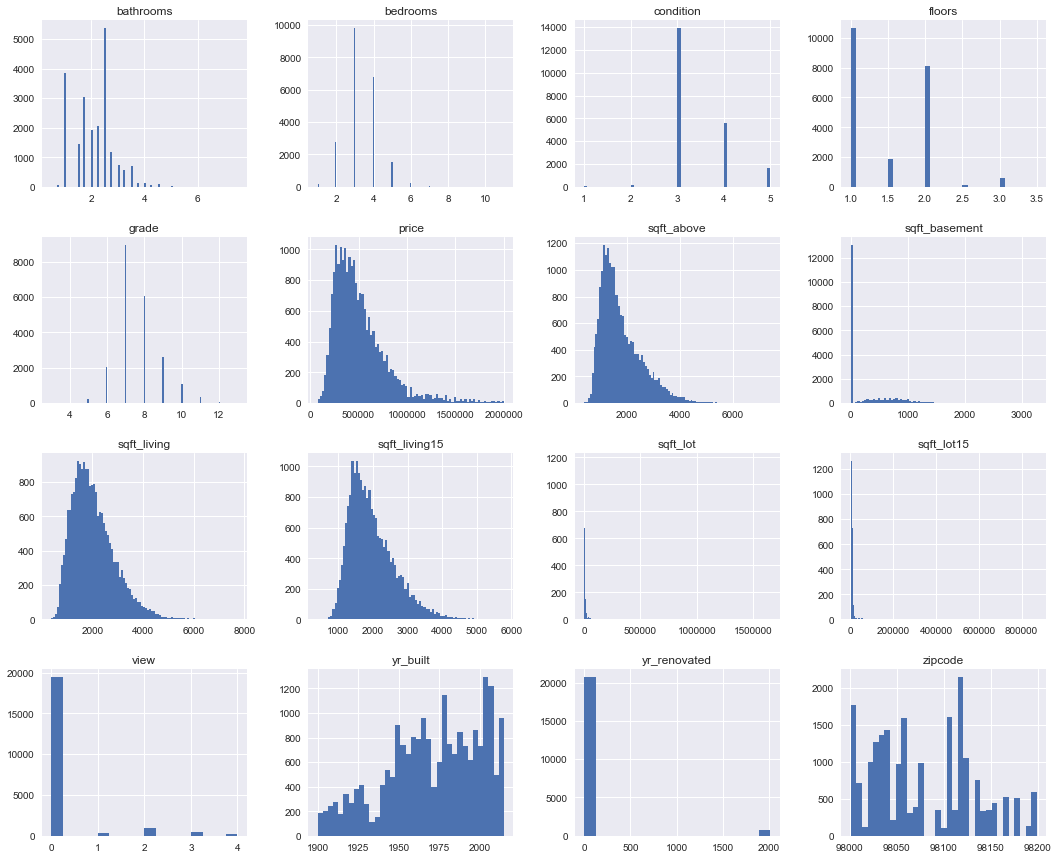

In [19]:
# Plot initial histograms to get a sense of which variables have a relationship and their distribution 

predictors_subset = ['price',
                     'bedrooms',
                     'bathrooms',
                     'floors',
                     'view',
                     'sqft_living',
                     'sqft_lot',
                     'condition',
                     'grade',
                     'sqft_above',
                     'sqft_basement',
                     'yr_built',
                     'yr_renovated',
                     'zipcode',
                     'sqft_living15',
                     'sqft_lot15']
house_sales_pred = house_sales.loc[:, predictors_subset]

house_sales_pred.hist(figsize=(18,15), bins='auto');

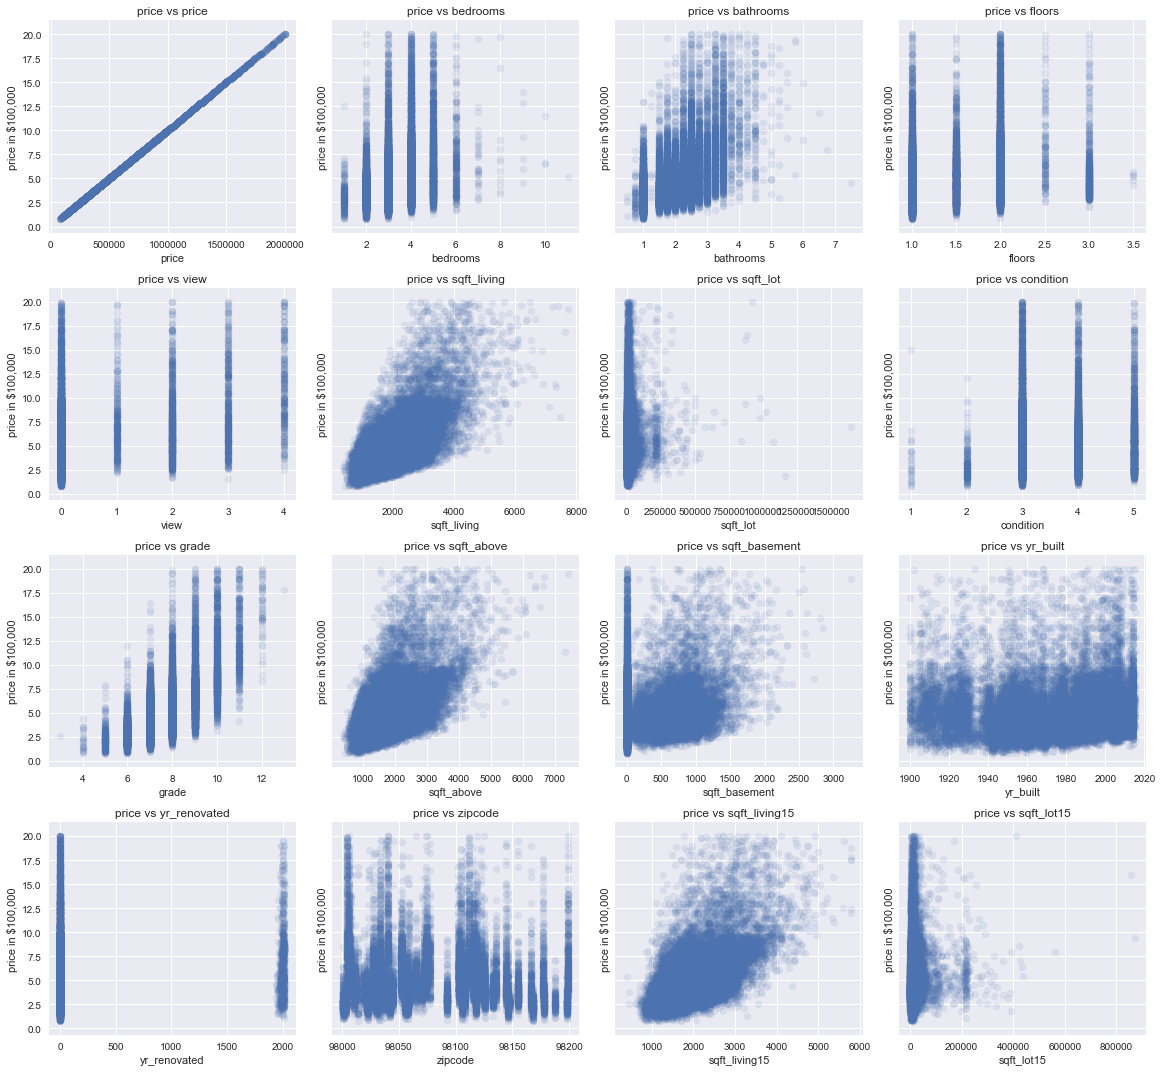

In [38]:
# Check the linearity assumption for all chosen features and highlight categorical variables

fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(16,15), sharey=True)

for ax,column in zip(axes.flatten(), house_sales_pred.columns):
    ax.scatter(house_sales_pred[column], house_sales_pred['price'] / 100000, label=column, alpha=0.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('price in $100,000')
    
fig.tight_layout()

In [119]:
# Initial check for multicollinearity

house_sales_coll = house_sales.drop(['price'], axis=1)

hs_coll = house_sales_coll.corr().abs().stack().reset_index().sort_values(0, ascending=False)
hs_coll['pairs'] = list(zip(hs_coll.level_0, hs_coll.level_1))
hs_coll.set_index(['pairs'], inplace=True)
hs_coll.drop(columns=['level_1','level_0'], inplace=True)
hs_coll.columns = ['cc']
hs_coll.drop_duplicates(inplace=True)
hs_coll[(hs_coll.cc > 0.75) & (hs_coll.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.867976
"(sqft_living15, sqft_living)",0.754698


In [106]:
# Create an initial, basic linear regression model using sqft_living which appears to meet the linearity assumption

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [53]:
f_one = 'price~sqft_living'

model_one = ols(formula=f_one, data=house_sales).fit()

model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.838e+04
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:02:00   Log-Likelihood:            -2.9272e+05
No. Observations:               21398   AIC:                         5.854e+05
Df Residuals:                   21396   BIC:                         5.855e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.415e+04   3724.471     14.539      0.000    4.69e+04    6.15e+04
sqft_living   226.7366      1.672    135.576      0.000     223.459     230.015
==============================================================================
Omnibus:                     5379.636   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18139.313
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                       6.743   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

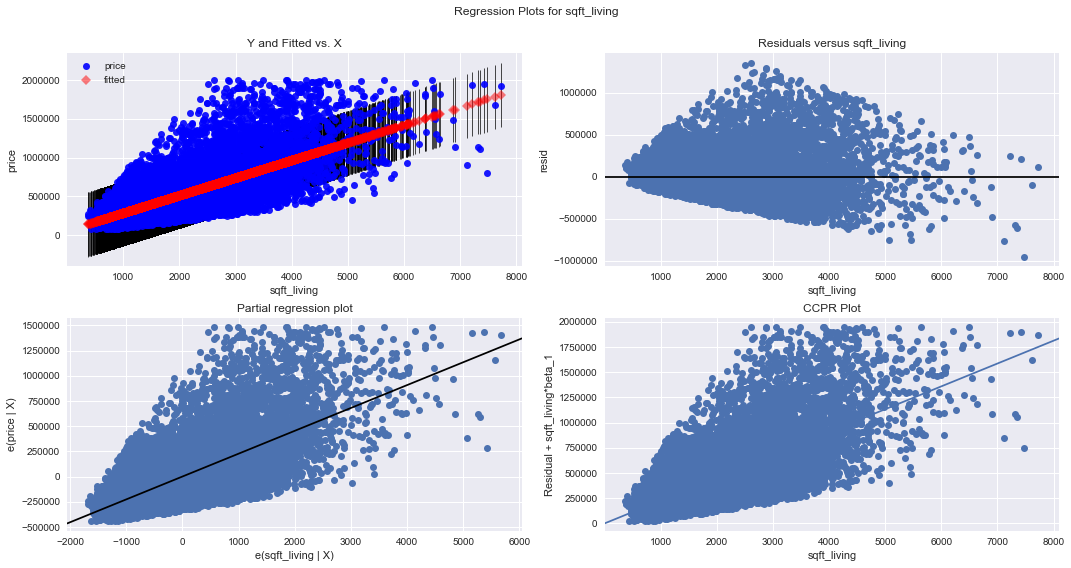

In [57]:
# Visualise the error terms
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_one, "sqft_living", fig=fig)
plt.show();

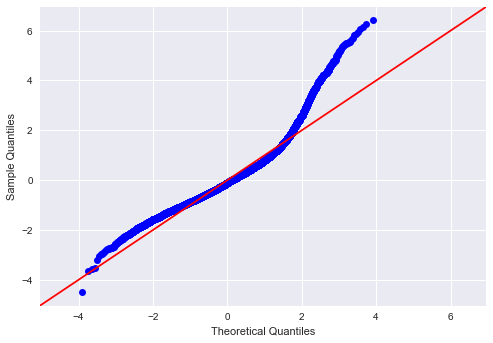

In [63]:
# Check the normality assumption
residuals_one = model_one.resid
fig = sm.graphics.qqplot(residuals_one, dist=stats.norm, line='45', fit=True)
fig.show()

#### Model 1 - Conclusion

At first glance, sqft_living appears to meet the linearity assumption but, having created an initial basic model, it appears to be heteroscedastic.  In addition, looking at the qq plot, the model residuals do not appear to be normally distributed.  The result of the Jarque-Bera test is also very high.  

The p-value is within acceptable bounds, **R-squared = 0.462**

---
### Model 2

Let's try log scaling and normalising the continuous variables to see if that improves the model.  
At the same time, we'll pre-flight the categorical variables so that they are ready to be added to the model when required.

**THE CODE BELOW NEEDS REFACTORING AS IT IS UGLY**

Create a new column / dummy variable to indicate whether the property is old or new then maintain it throughout the transformations

In [190]:
# Log transform continuous variables and one-hot encode categoricals

continuous = ['price','sqft_living','sqft_lot']
categoricals = ['bathrooms','bedrooms','condition','grade','zipcode']

house_sales_cont = house_sales[continuous]
new_house_sales_cont = new_house_sales[continuous]

# Log features
log_names = [f'{column}_log' for column in house_sales_cont.columns]
new_log_names = [f'{column}_log' for column in new_house_sales_cont.columns]

house_sales_log = np.log(house_sales_cont)
new_house_sales_log = np.log(new_house_sales_cont)
house_sales_log.columns = log_names
new_house_sales_log.columns = new_log_names

# Normalize
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

house_sales_log_norm = house_sales_log.apply(normalize)
new_house_sales_log_norm = new_house_sales_log.apply(normalize)

# One hot encode categoricals
house_sales_ohe = pd.get_dummies(house_sales[categoricals], columns=categoricals, drop_first=True)
new_house_sales_ohe = pd.get_dummies(new_house_sales[categoricals], columns=categoricals, drop_first=True)

hs_preprocessed = pd.concat([house_sales_log_norm, house_sales_ohe], axis=1)
new_hs_preprocessed = pd.concat([new_house_sales_log_norm, new_house_sales_ohe], axis=1)

hs_preprocessed.head()

,price_log,sqft_living_log,sqft_lot_log,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-1.442432,-1.127947,-0.381614,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.326988,0.744994,-0.106204,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.860536,-2.155091,0.251799,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.558178,0.093015,-0.517208,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.220203,-0.277898,0.015273,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
f_two = 'price_log~sqft_living_log'

model_two = ols(formula=f_two, data=hs_preprocessed).fit()

model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:04:55   Log-Likelihood:                -24350.
No. Observations:               21398   AIC:                         4.870e+04
Df Residuals:                   21396   BIC:                         4.872e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        9.489e-16      0.005   1.84e-13      1.000      -0.010       0.010
sqft_living_log     0.6556      0.005    127.010      0.000       0.646       0.666
==============================================================================
Omnibus:                      189.647   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.086
Skew:                           0.044   Prob(JB):                     2.53e-28
Kurtosis:                       2.633   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

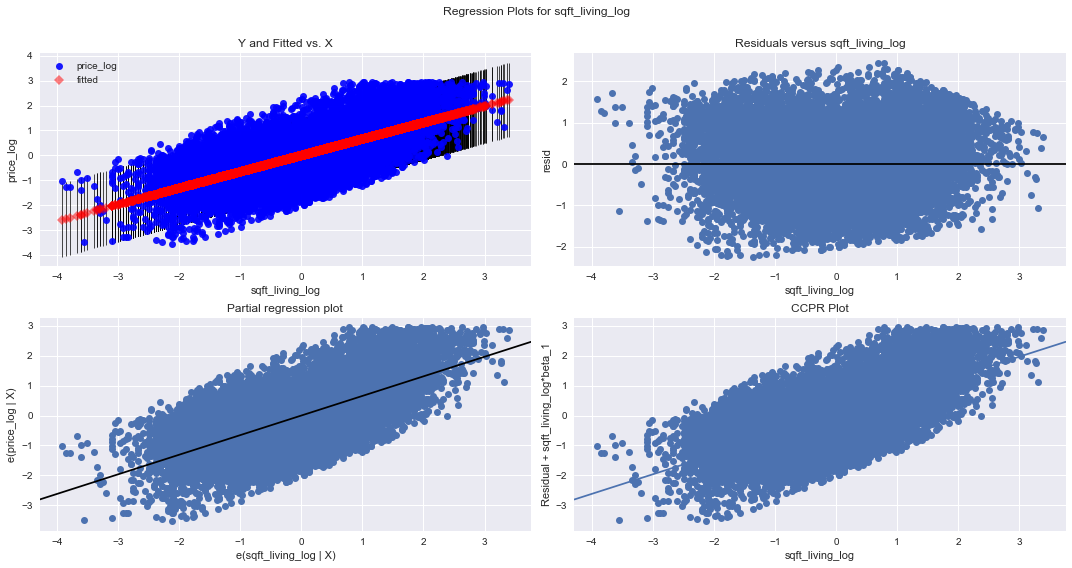

In [192]:
# Visualise the error terms
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_two, "sqft_living_log", fig=fig)
plt.show();

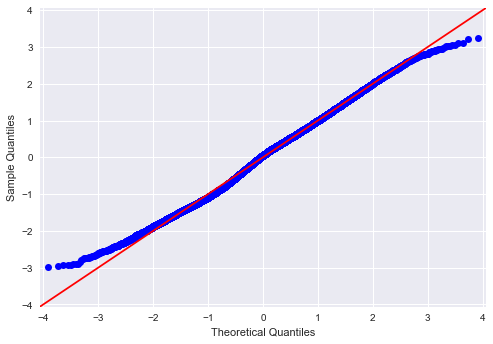

In [193]:
residuals_two = model_two.resid
fig = sm.graphics.qqplot(residuals_two, dist=stats.norm, line='45', fit=True)
fig.show();

#### Model 2 - Conclusion

Scaling and normalising the variables has improved the model with regard the assumptions for linear regression with residuals being more normally distributed and the appearance of homoscedasticity.   

The p-value remains within acceptable bounds and the Jarque-Bera test score has reduced considerably but the overall fit for the model has also reduced, **R-squared = 0.430**

---
### Model 3

From the plots above, we can see that zip code has a noticeable effect on gradient of the relationship between sqft_living and price, with living space having a greater effect on price in certain zip codes than others.

Let's briefly filter our dataset based on a single zipcode to see what effect it has on our model before considering including zip codes more formally in our overall model.

In [194]:
zip_98052 = hs_preprocessed[(hs_preprocessed['zipcode_98052'] == 1)]

f_98052 = 'price_log~sqft_living_log'

model_98052 = ols(formula=f_98052, data=zip_98052).fit()

model_98052.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1294.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          7.08e-149
Time:                        14:05:44   Log-Likelihood:                -146.61
No. Observations:                 573   AIC:                             297.2
Df Residuals:                     571   BIC:                             305.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3526      0.015     23.827      0.000       0.324       0.382
sqft_living_log     0.5986      0.017     35.971      0.000       0.566       0.631
==============================================================================
Omnibus:                       80.882   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.815
Skew:                           0.394   Prob(JB):                    1.48e-115
Kurtosis:                       7.640   Cond. No.                         1.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

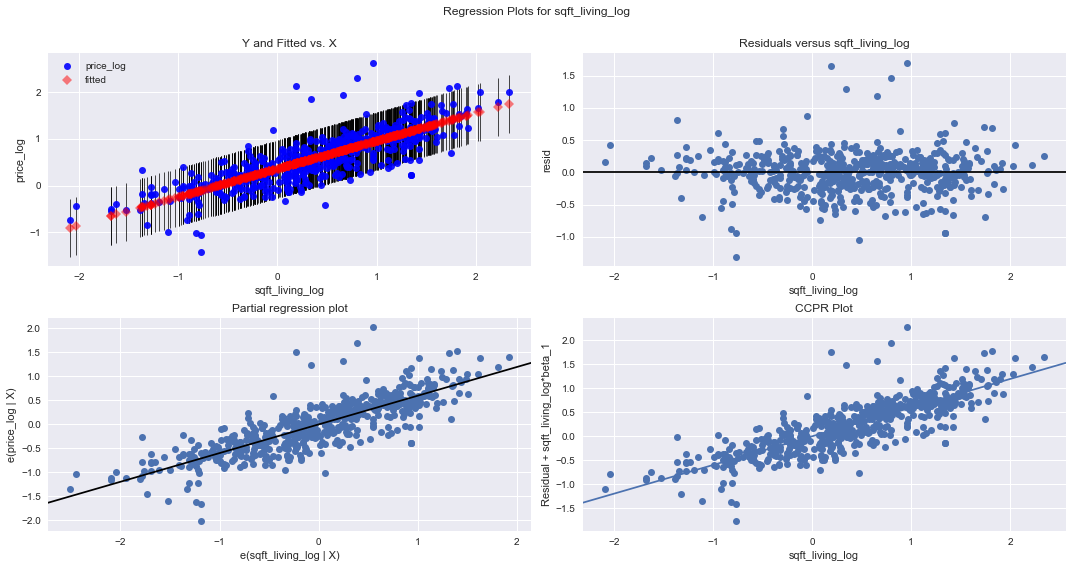

In [195]:
# Visualise the error terms
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_98052, "sqft_living_log", fig=fig)
plt.show();

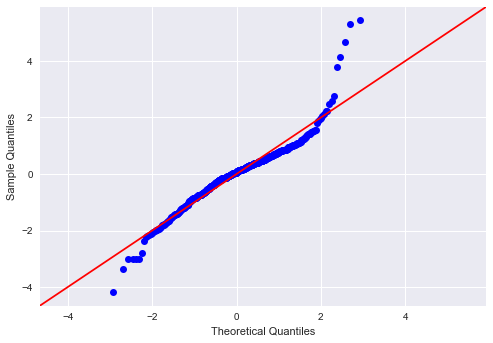

In [196]:

residuals_98052 = model_98052.resid
fig = sm.graphics.qqplot(residuals_98052, dist=stats.norm, line='45', fit=True)
fig.show();

---
### Model 4

In [197]:
outcome = 'price_log'
x_cols = ['sqft_living_log',
          'sqft_lot_log',
          'bedrooms_2',
          'condition_2',
          'condition_3',
          'condition_4',
          'condition_5',
          'grade_7',
          'grade_8',
          'grade_9',
          'grade_10',
          'grade_11',
          'grade_12',
          'zipcode_98103',
          'zipcode_98038',
          'zipcode_98115',
          'zipcode_98052',
          'zipcode_98117',
          'zipcode_98042',
          'zipcode_98034',
          'zipcode_98023',
          'zipcode_98006',
          
         ]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_four = ols(formula=formula, data=hs_preprocessed).fit()
model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1622.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:05:59   Log-Likelihood:                -19858.
No. Observations:               21398   AIC:                         3.976e+04
Df Residuals:                   21375   BIC:                         3.995e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7540      0.114     -6.593      0.000      -0.978      -0.530
sqft_living_log     0.4157      0.007     60.318      0.000       0.402       0.429
sqft_lot_log       -0.0366      0.005     -7.757      0.000      -0.046      -0.027
bedrooms_2          0.2148      0.014     14.993      0.000       0.187       0.243
condition_2        -0.1126      0.123     -0.914      0.361      -0.354       0.129
condition_3         0.0737      0.114      0.645      0.519      -0.150       0.298
condition_4         0.2493      0.114      2.180      0.029       0.025       0.473
condition_5         0.4545      0.115      3.951      0.000       0.229       0.680
grade_7             0.3035      0.016     19.247      0.000       0.273       0.334
grade_8             0.6791      0.018     36.917      0.000       0.643       0.715
grade_9             1.1315      0.023     49.635      0.000       1.087       1.176
grade_10            1.5010      0.029     52.510      0.000       1.445       1.557
grade_11            1.7842      0.042     42.859      0.000       1.703       1.866
grade_12            2.0881      0.086     24.144      0.000       1.919       2.258
zipcode_98103       0.6003      0.026     23.088      0.000       0.549       0.651
zipcode_98038      -0.5251      0.026    -20.343      0.000      -0.576      -0.475
zipcode_98115       0.6579      0.026     25.245      0.000       0.607       0.709
zipcode_98052       0.2737      0.026     10.457      0.000       0.222       0.325
zipcode_98117       0.6222      0.027     23.246      0.000       0.570       0.675
zipcode_98042      -0.7422      0.027    -27.794      0.000      -0.794      -0.690
zipcode_98034       0.1876      0.027      6.967      0.000       0.135       0.240
zipcode_98023      -0.9553      0.028    -34.216      0.000      -1.010      -0.901
zipcode_98006       0.2562      0.029      8.910      0.000       0.200       0.312
==============================================================================
Omnibus:                      262.439   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.905
Skew:                           0.174   Prob(JB):                     6.34e-77
Kurtosis:                       3.522   Cond. No.                         82.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
### Model Evaluation using Train-Test Split

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = zip_98052.drop(['price_log'], axis=1)
y = zip_98052[['price_log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

458 115 458 115


In [203]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

Train MSE: 0.0741127394254308
Test MSE: 0.05464710511138692


---
### Feature Ranking with Recursive Feature Elimination

In [204]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X, y.values.ravel())
selector.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])